In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

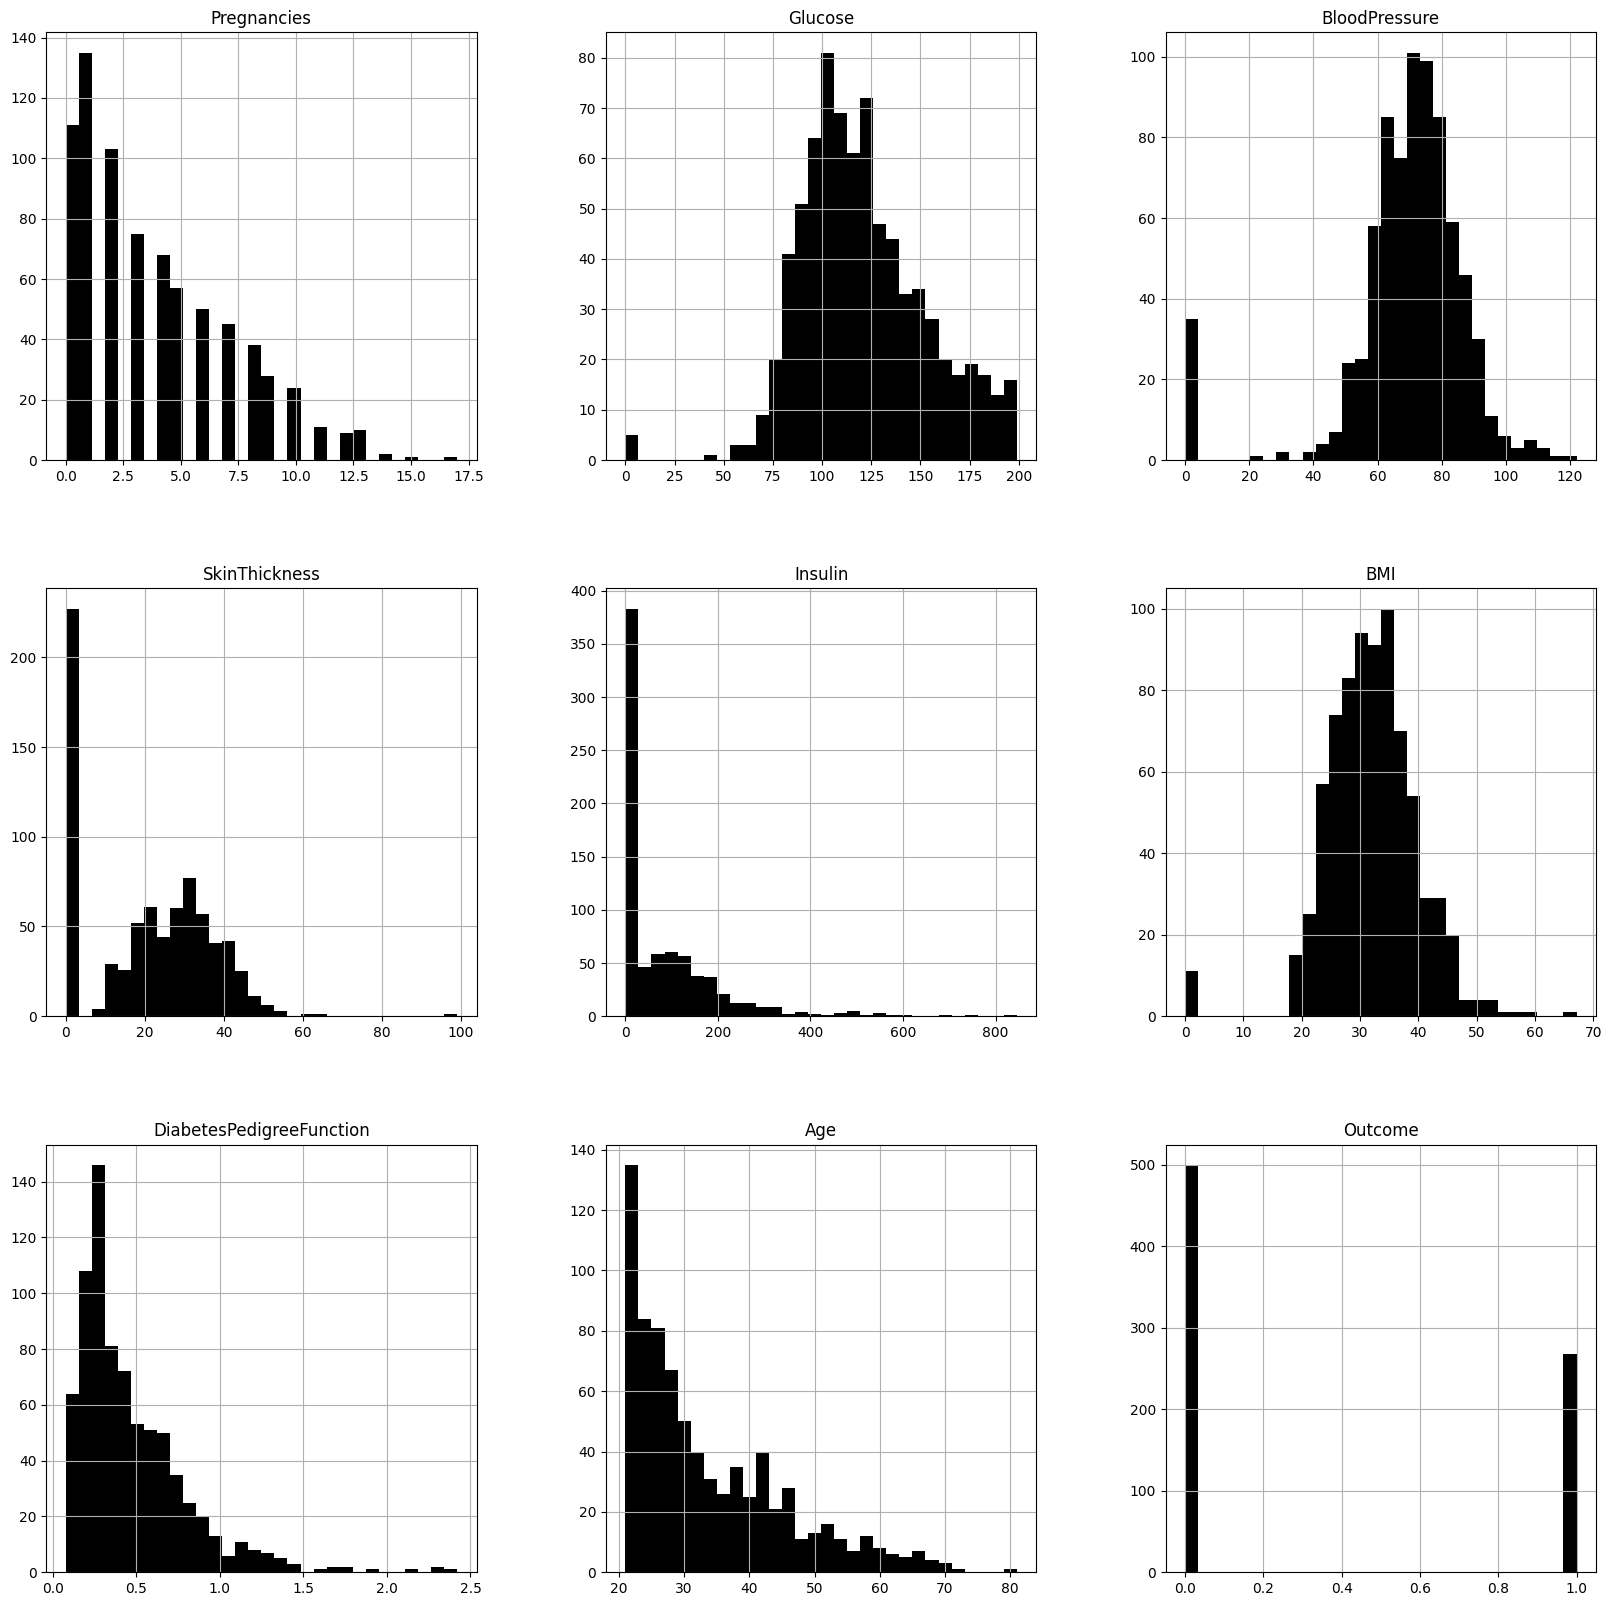

In [5]:
df.hist(bins=30, figsize = (20,20), color="black")

<Axes: >

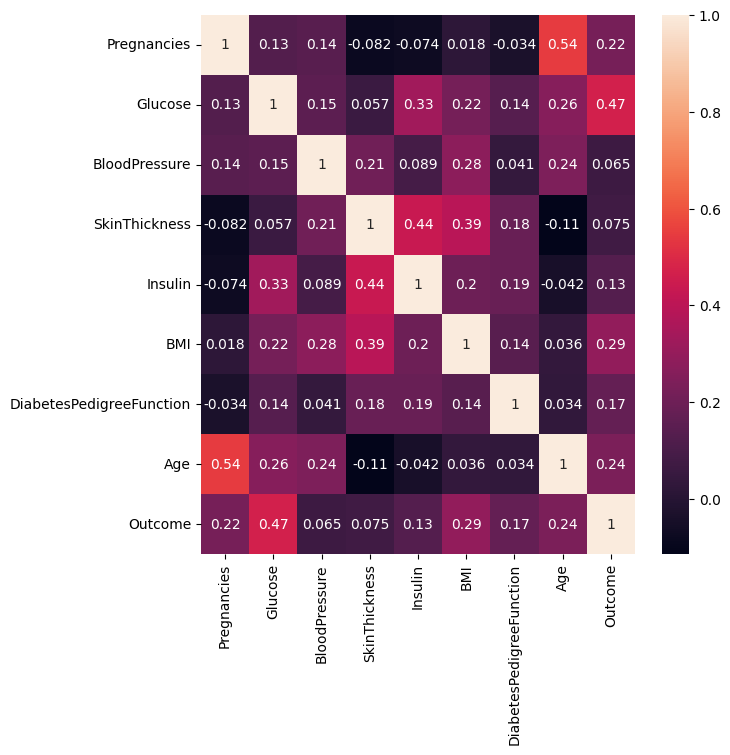

In [9]:
corr_matrix = df.corr()
fig = plt.subplots(figsize= (7,7))
sns.heatmap(corr_matrix, annot=True)

In [16]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [17]:
y.shape

(768,)

In [18]:
X.shape

(768, 8)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
X_train.shape

(614, 8)

In [21]:
X_test.shape

(154, 8)

In [22]:
y_train.shape

(614,)

In [23]:
y_test.shape

(154,)

In [30]:
# Train an XGBoost classifier model
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(objective ='binary:logistic', eval_metric = 'error', learning_rate = 0.1, max_depth = 5, n_estimators = 10, use_label_encoder=False)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
# predict the score of the trained model using the testing dataset
result = xgb_classifier.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.7402597402597403


In [33]:
# make predictions on the test data
y_predict = xgb_classifier.predict(X_test)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82        97
           1       0.77      0.42      0.55        57

    accuracy                           0.74       154
   macro avg       0.75      0.67      0.68       154
weighted avg       0.75      0.74      0.72       154



<Axes: >

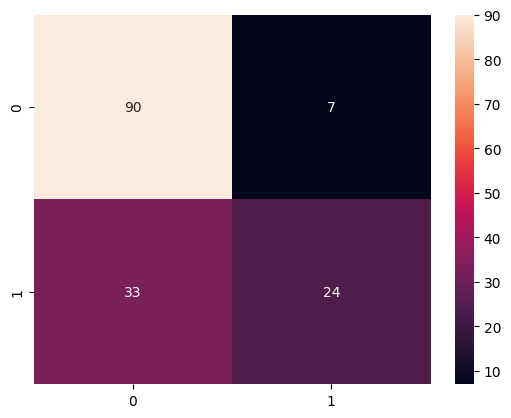

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt = 'd', annot = True)